In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.formula.api as smf
import pymannkendall as mk

In [7]:
met_file = pd.read_csv(r"C:\Users\agneh\Box\Hydrology_Lab\Undergraduates\URSA\Gracie Neher\ForSubmission\Final_Data\CB_snotel_cleaned.csv")
met_df_unclean = pd.DataFrame(met_file)
met_df_unclean['date'] = pd.to_datetime(met_df_unclean['date'])
met_df_unclean['year'] = met_df_unclean['date'].dt.year
met_df = met_df_unclean.dropna()
met_df = met_df[1:-1]
met_df['water_year'] = met_df['wy']

In [5]:
peak_swe = met_df.loc[met_df.groupby('water_year')['swe'].idxmax(), ['water_year', 'water_year_day', 'swe']]
day_1 = met_df[met_df['water_year_day'] == 1]
change_in_swe = peak_swe['swe'].values - day_1['swe'].values
peak_swe['slope'] = (peak_swe['swe'].values - day_1['swe'].values)*2.54 / peak_swe['water_year_day']

In [6]:
freezing = met_df_unclean[met_df_unclean['temp_avg'] < 32]
spring_freezing = freezing[freezing['date'].dt.month.isin([4, 5, 6])]
n_f_spring = spring_freezing.groupby('year').size().reset_index(name = 'number')
n_f_spring = n_f_spring[:-1]

In [ ]:
freeze_days = (met_df[met_df['temp_avg'] <= 32].groupby('water_year', as_index=False).size().rename(columns={'size': 'n_freeze_days'}))
non_freeze_days = (met_df[met_df['temp_avg'] > 32].groupby('water_year', as_index=False).size().rename(columns={'size': 'n_nonfreeze_days'}))

freeze_summary = pd.merge(freeze_days, non_freeze_days, on='water_year', how='outer').fillna(0)
freeze_summary['total_days'] = freeze_summary['n_freeze_days'] + freeze_summary['n_nonfreeze_days']
freeze_summary = freeze_summary[freeze_summary['total_days'] >= 350]

                            OLS Regression Results                            
Dep. Variable:         water_year_day   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     5.807
Date:                Thu, 12 Feb 2026   Prob (F-statistic):             0.0210
Time:                        18:45:35   Log-Likelihood:                -148.72
No. Observations:                  39   AIC:                             301.4
Df Residuals:                      37   BIC:                             304.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    964.2557    321.014      3.004      0.0

Text(0.5, 1.0, 'Day of peak SWE')

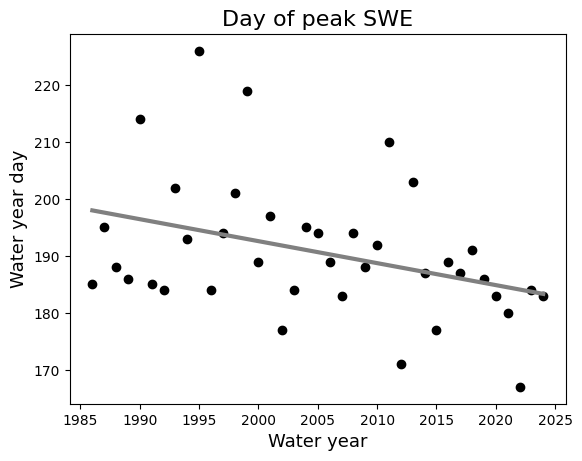

In [9]:
#Figure S4a
peak_snow = met_df.loc[met_df.groupby('water_year')['swe'].idxmax(), ['water_year', 'water_year_day', 'swe']]
peak_snow['swe_cm'] = peak_snow['swe']*2.54

m, b = np.polyfit(peak_snow['water_year'], peak_snow['water_year_day'], 1)
regress_y = m * peak_snow['water_year'] + b
model = smf.ols(formula='water_year_day ~ water_year', data=peak_snow).fit()
print(model.summary())
mk_peak_swe = mk.original_test(peak_snow['water_year_day'])
print(mk_peak_swe)

plt.plot(peak_snow['water_year'], regress_y, color = 'grey', linewidth = 3)
plt.scatter(peak_snow['water_year'], peak_snow['water_year_day'], color = 'black')
plt.xlabel('Water year', size = 13)
plt.ylabel('Water year day', size = 13)
plt.title('Day of peak SWE', size = 16)

                            OLS Regression Results                            
Dep. Variable:       n_nonfreeze_days   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     27.75
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           9.96e-06
Time:                        18:45:46   Log-Likelihood:                -131.38
No. Observations:                  33   AIC:                             266.8
Df Residuals:                      31   BIC:                             269.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1954.7161    409.176     -4.777      0.0

Text(0.5, 1.0, 'Days above freezing')

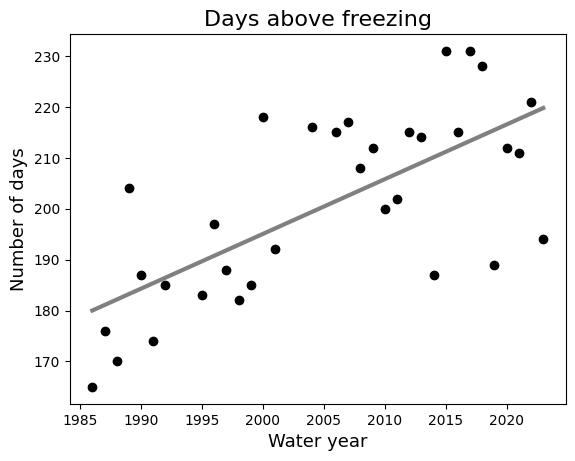

In [10]:
#Figure S4b
m, b = np.polyfit(freeze_summary['water_year'], freeze_summary['n_nonfreeze_days'], 1)
regress_y = m * freeze_summary['water_year'] + b
model = smf.ols(formula='n_nonfreeze_days ~ water_year', data=freeze_summary).fit()
print(model.summary())
mk_nonfreeze = mk.original_test(freeze_summary['n_nonfreeze_days'])
print(mk_nonfreeze)

plt.plot(freeze_summary['water_year'], regress_y, color = 'grey', linewidth = 3)
plt.scatter(freeze_summary['water_year'], freeze_summary['n_nonfreeze_days'], color = 'black')
plt.xlabel('Water year', size = 13)
plt.ylabel('Number of days', size = 13)
plt.title('Days above freezing', size = 16)

                            OLS Regression Results                            
Dep. Variable:          n_freeze_days   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     22.40
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           4.61e-05
Time:                        18:45:50   Log-Likelihood:                -131.39
No. Observations:                  33   AIC:                             266.8
Df Residuals:                      31   BIC:                             269.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2099.0789    409.219      5.129      0.0

Text(0.5, 1.0, 'Days below freezing')

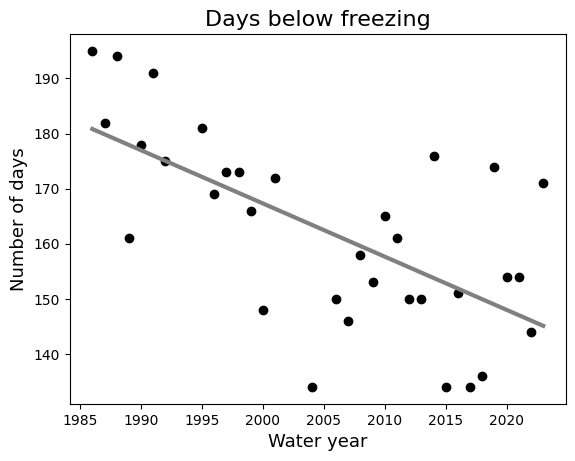

In [11]:
#Figure S4c
m, b = np.polyfit(freeze_summary['water_year'], freeze_summary['n_freeze_days'], 1)
regress_y = m * freeze_summary['water_year'] + b
model = smf.ols(formula='n_freeze_days ~ water_year', data=freeze_summary).fit()
print(model.summary())
mk_freeze = mk.original_test(freeze_summary['n_freeze_days'])
print(mk_freeze)

plt.plot(freeze_summary['water_year'], regress_y, color = 'grey', linewidth = 3)
plt.scatter(freeze_summary['water_year'], freeze_summary['n_freeze_days'], color = 'black')
plt.xlabel('Water year', size = 13)
plt.ylabel('Number of days', size = 13)
plt.title('Days below freezing', size = 16)

                            OLS Regression Results                            
Dep. Variable:                 number   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     15.28
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           0.000407
Time:                        18:46:23   Log-Likelihood:                -117.19
No. Observations:                  37   AIC:                             238.4
Df Residuals:                      35   BIC:                             241.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    702.7741    175.194      4.011      0.0

Text(0.5, 1.0, 'Spring freezing days')

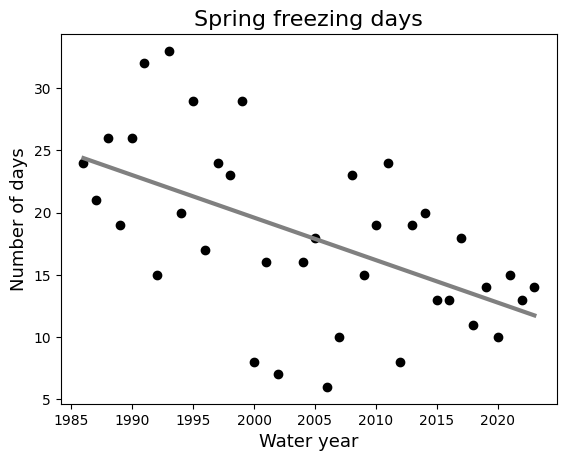

In [13]:
#Figure S4d
m, b = np.polyfit(n_f_spring['year'], n_f_spring['number'], 1)
regress_y = m * n_f_spring['year'] + b
model = smf.ols(formula='number ~ year', data=n_f_spring).fit()
print(model.summary())
mk_spring = mk.original_test(n_f_spring['number'])
print(mk_spring)

plt.plot(n_f_spring['year'], regress_y, color = 'grey', linewidth = 3)
plt.scatter(n_f_spring['year'], n_f_spring['number'], color = 'black')
plt.xlabel('Water year', size = 13)
plt.ylabel('Number of days', size = 13)
plt.title('Spring freezing days', size = 16)